# Visualize GAR Global Flood Hazard Map with Python

Flooding is one of the most damaging natural hazards, accounting for 31% of all economic losses worldwide resulting from natural hazards(European Commission, 2007; UNISDR and CRED, 2015). Over the period 1980-2013, flood losses exceeded $1 trillion globally, and resulted in ca. 220,000 fatalities (Re, 2014). Moreover, with the frequency and magnitude of flood disasters projected to increase due to both climate change and growing population exposure [UNISDR 2009; Jongman et al., 2012], flooding is one of the key societal challenges for this century.

Quantifying flood hazard is an essential component of resilience planning, emergency response, and mitigation, including insurance (Trigg et al., 2016). Flood hazard maps (showing the probability and magnitude of flood events over an area) and flood risk assessment maps (showing potential consequences of a flood event in terms of affected population and assets, and expected economic damages) can increase preparedness and improve land use planning and management in flood prone areas. On the other hand, reliable and fast flood forecasting tools are crucial to develop effective emergency response strategies and to prevent and reduce impacts (Dottori et al., 2016).

Thanks to mathematical models for predicting and mapping flood hazard and risk, model outputs are now available and being used to address science and management questions related to flood risk, including the issue of how these risks could change in the future due to climate change and socioeconomic development(e.g.,Dottori et al., 2016).

In this notebook, [the 2015 GAR global flood hazard layer](http://preview.grid.unep.ch/index.php?preview=data&lang=eng) will be visualized using Python. The data is a probabilistic model based on available streamflow data from 8,000 stations around the world. The GAR model then calculates potential discharge at selected points along rivers and the resulting flood extent. Flood hazard is reported at 1 km resolution for 25-, 50-, 100-, 500-, and 1,000-year return periods. The flood hazard map has been prepared down to country levels. Australia is taken as an example.

## 1. Load all needed libraries

In [1]:
import numpy as np
import numpy.ma as ma
from osgeo import gdal
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

%matplotlib inline

matplotlib inline


## 2. Load data

### 2.1 Read data and mask arr<=0.0

In [2]:
geo = gdal.Open('data\Hazard_AUS__1000.grd')
arr = geo.ReadAsArray()
arr = ma.masked_less_equal(arr, 0.0, copy=True)

### 2.2 Prepare coordinates

In [3]:
x_coords = np.arange(geo.RasterXSize)
y_coords = np.arange(geo.RasterYSize)
(upper_left_x, x_size, x_rotation, upper_left_y, y_rotation, y_size) = geo.GetGeoTransform()

x_coords = x_coords * x_size + upper_left_x + (x_size / 2)  # add half the cell size
y_coords = y_coords * y_size + upper_left_y + (y_size / 2)  # to centre the point

## 3. Visualize

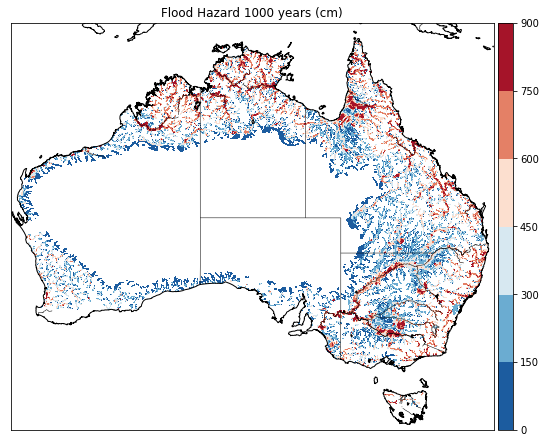

In [4]:
fig = plt.figure(figsize=(9, 15))
ax = fig.add_subplot(1, 1, 1)

m = Basemap(projection='cyl', resolution='i',
        llcrnrlon=min(x_coords), llcrnrlat=min(y_coords),
        urcrnrlon=max(x_coords), urcrnrlat=max(y_coords))
x, y = m(*np.meshgrid(x_coords, y_coords))
#m.arcgisimage(service='World_Terrain_Base', xpixels = 3500, dpi=500, verbose= True)
cs = m.contourf(x, y, arr, cmap='RdBu_r')
m.drawcoastlines()
m.drawrivers()
m.drawstates()
cb = m.colorbar(cs, pad="1%", size="3%",)
plt.title('Flood Hazard 1000 years (cm)')

## References

John D. Hunter. Matplotlib: A 2D Graphics Environment, Computing in Science & Engineering, 9, 90-95 (2007), DOI:10.1109/MCSE.2007.55

Stéfan van der Walt, S. Chris Colbert and Gaël Varoquaux. The NumPy Array: A Structure for Efficient Numerical Computation, Computing in Science & Engineering, 13, 22-30 (2011), DOI:10.1109/MCSE.2011.37

Centre for Research on the Epidemiology of Disasters (CRED), 2015. The Human Cost of Weather-Related Disasters 1995-2015 Report. http://www.unisdr.org/2015/docs/climatechange/COP21_WeatherDisastersReport_2015_FINAL.pdf

Dottori F, Salamon P, Bianchi A, Alfieri L, Hirpa F A and Feyen L 2016 Development and evaluation of a framework for global flood hazard mapping Adv. Water Res. 94 87–102

European Commission, 2007. Directive 2007/60/EC of the European Parliament and of the Council of 23 October 2007 on the assessment and management of flood risks. Official J. Eur. Union L 288, 27–34.

Jongman, B., Ward, P.J., Aerts, J.C.J.H., 2012. Global exposure to river and coastal flooding: long term trends and changes. Global Environ. Chang. 22, 823–835.

Re, M., 2014. NatCat SERVICE Database. Munich RE, Munich

Trigg, M. A. et al. The credibility challenge for global fluvial flood risk analysis. Environ. Res. Lett. 11, 094014 (2016).

UN International Strategy for Disaster Reduction (UNISDR), 2009. Reducing Disaster Risks through Science: Issues and Actions. Geneva.